In [2]:
pip install pandas matplotlib seaborn


In [10]:
pip install pandas openpyxl matplotlib seaborn


In [12]:
from google.colab import files
uploaded = files.upload()


Saving Online_retail.xlsx to Online_retail.xlsx


In [13]:
import pandas as pd

df = pd.read_excel("Online_retail.xlsx")
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl


            Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                 
12346.0         326          1  77183.60  1  1  5         115          7   
12347.0           2          7   4310.00  5  5  5         555         15   
12348.0          75          4   1797.24  2  4  4         244         10   
12349.0          19          1   1757.55  4  1  4         414          9   
12350.0         310          1    334.40  1  1  2         112          4   

                    Segment  
CustomerID                   
12346.0     Loyal Customers  
12347.0           Champions  
12348.0           Champions  
12349.0           Champions  
12350.0             At Risk  


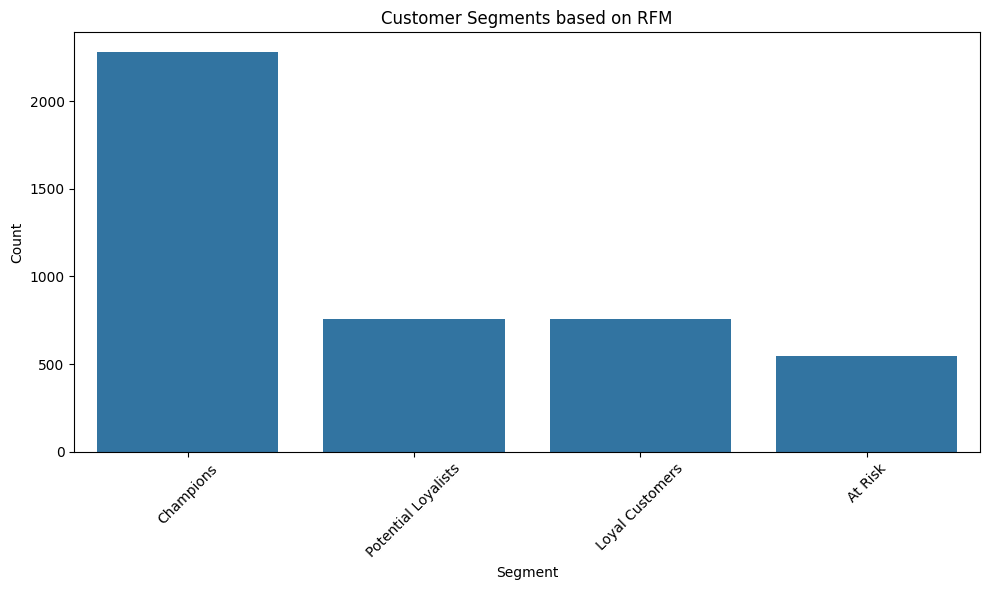

In [15]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset from Excel file
df = pd.read_excel("Online_retail.xlsx")

# Step 2: Clean the data (optional but recommended)
df.dropna(subset=['CustomerID'], inplace=True)  # Remove missing customer IDs
df = df[df['Quantity'] > 0]                      # Only positive quantity
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 3: Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 4: Set reference date for Recency calculation
NOW = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Step 5: Group by CustomerID and calculate RFM values
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (NOW - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                         # Frequency
    'TotalPrice': 'sum'                             # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Step 6: RFM Scoring
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Step 7: Combine RFM scores
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].astype(int).sum(axis=1)

# Step 8: Define segments based on RFM_Score
def segment(x):
    if x >= 9:
        return 'Champions'
    elif x >= 7:
        return 'Loyal Customers'
    elif x >= 5:
        return 'Potential Loyalists'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)

# Step 9: Output Results
print(rfm.head())

# Step 10: Visualize segments
plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Segments based on RFM')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-16-3505280483.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')


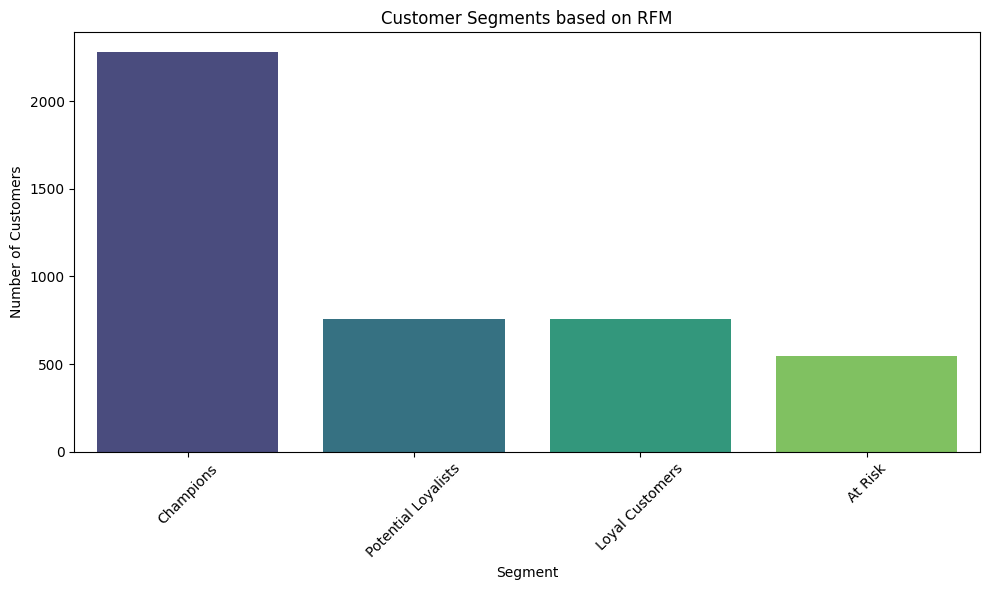

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Customer Segments based on RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


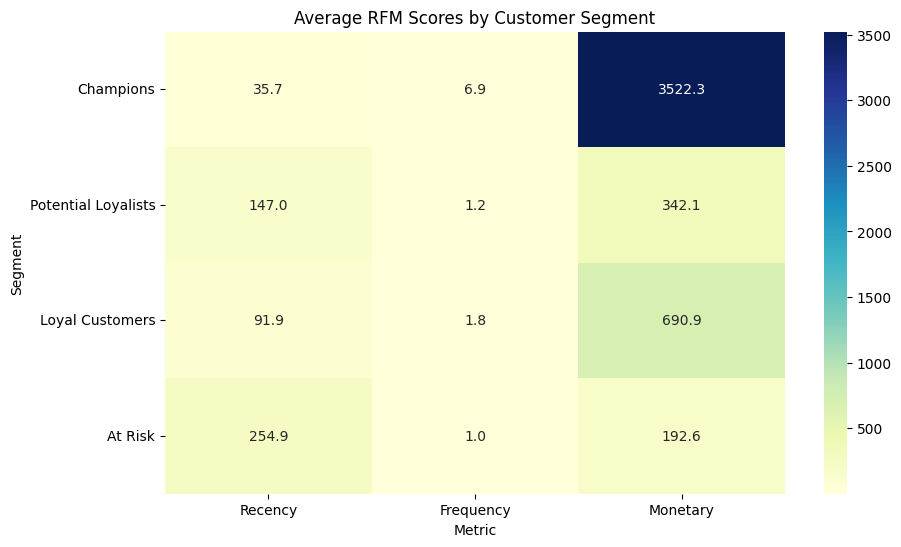

In [17]:
import numpy as np

# Group by segment and calculate average R, F, M
segment_avg = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

# Sort for better visualization
segment_avg = segment_avg.loc[rfm['Segment'].value_counts().index]

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(segment_avg, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average RFM Scores by Customer Segment")
plt.xlabel("Metric")
plt.ylabel("Segment")
plt.show()
